In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

In [2]:
random_state("rng_states/experiment6.npy")

In [3]:
S = [0.6] * 60
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

rectangles = [((-25., 3.), (-2.55, 5.)), ((-2.25, 3.), (25., 5.)),
              ((-25., 8.), (2.25, 9.)), ((2.55, 8.), (25., 9.))]
rectangle_vs = [(0.4, 0.1)] * (len(rectangles) // 2) + [(-0.4, -0.1)] * (len(rectangles) // 2)
targets = np.array([0., 10.]) + np.random.uniform(-0.5, 0.5, size=(T, 2))
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 800
alpha_inf = 0.85
n_immigrants = 300
eta_c = 5.
eta_m = 20.
p_c = 0.9
p_m = 0.05
num_iterations_init = 400
num_iterations = 200

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=40)

t=0
Iteration 0, #feasible: 235, best: [47.49073997], #infeasible: 565, best: [0.06493497 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 40, #feasible: 120, best: [47.0899516], #infeasible: 680, best: [0.0019665 1.       ]
Iteration 80, #feasible: 120, best: [28.40323223], #infeasible: 680, best: [8.27782234e-04 1.00000000e+00]
Iteration 120, #feasible: 120, best: [5.59678406], #infeasible: 680, best: [7.8126293e-05 1.0000000e+00]
Iteration 160, #feasible: 120, best: [4.56024028], #infeasible: 680, best: [7.8126293e-05 1.0000000e+00]
Iteration 200, #feasible: 120, best: [4.31064056], #infeasible: 680, best: [1.55568215e-05 1.00000000e+00]
Iteration 240, #feasible: 120, best: [3.94916119], #infeasible: 680, best: [1.55568215e-05 1.00000000e+00]
Iteration 280, #feasible: 120, best: [3.86008057], #infeasible: 680, best: [1.09468064e-05 1.00000000e+00]
Iteration 320, #feasible: 120, best: [3.86008057], #infeasible: 680, best: [1.09468064e-05 1.00000000e+00]
Iteration 360, #feasible: 120, best: [3.69813748], #infeasible: 680, best: [1.09468064e-05 1.00000000e+00]
Iteration 399, #feasible: 120, best: [3.61002594], #

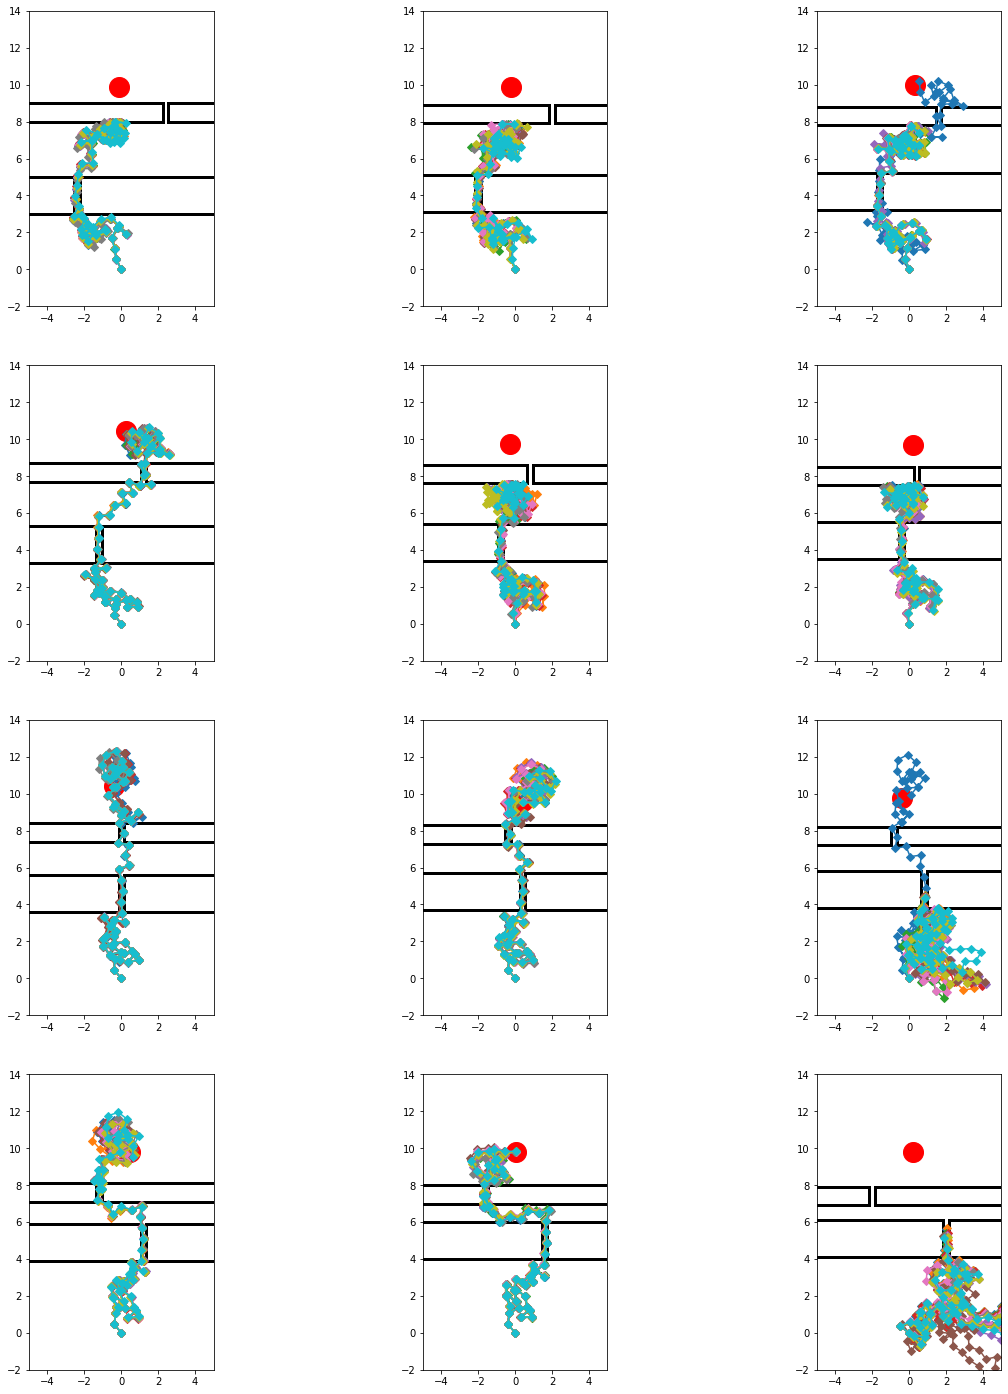

In [4]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 14))

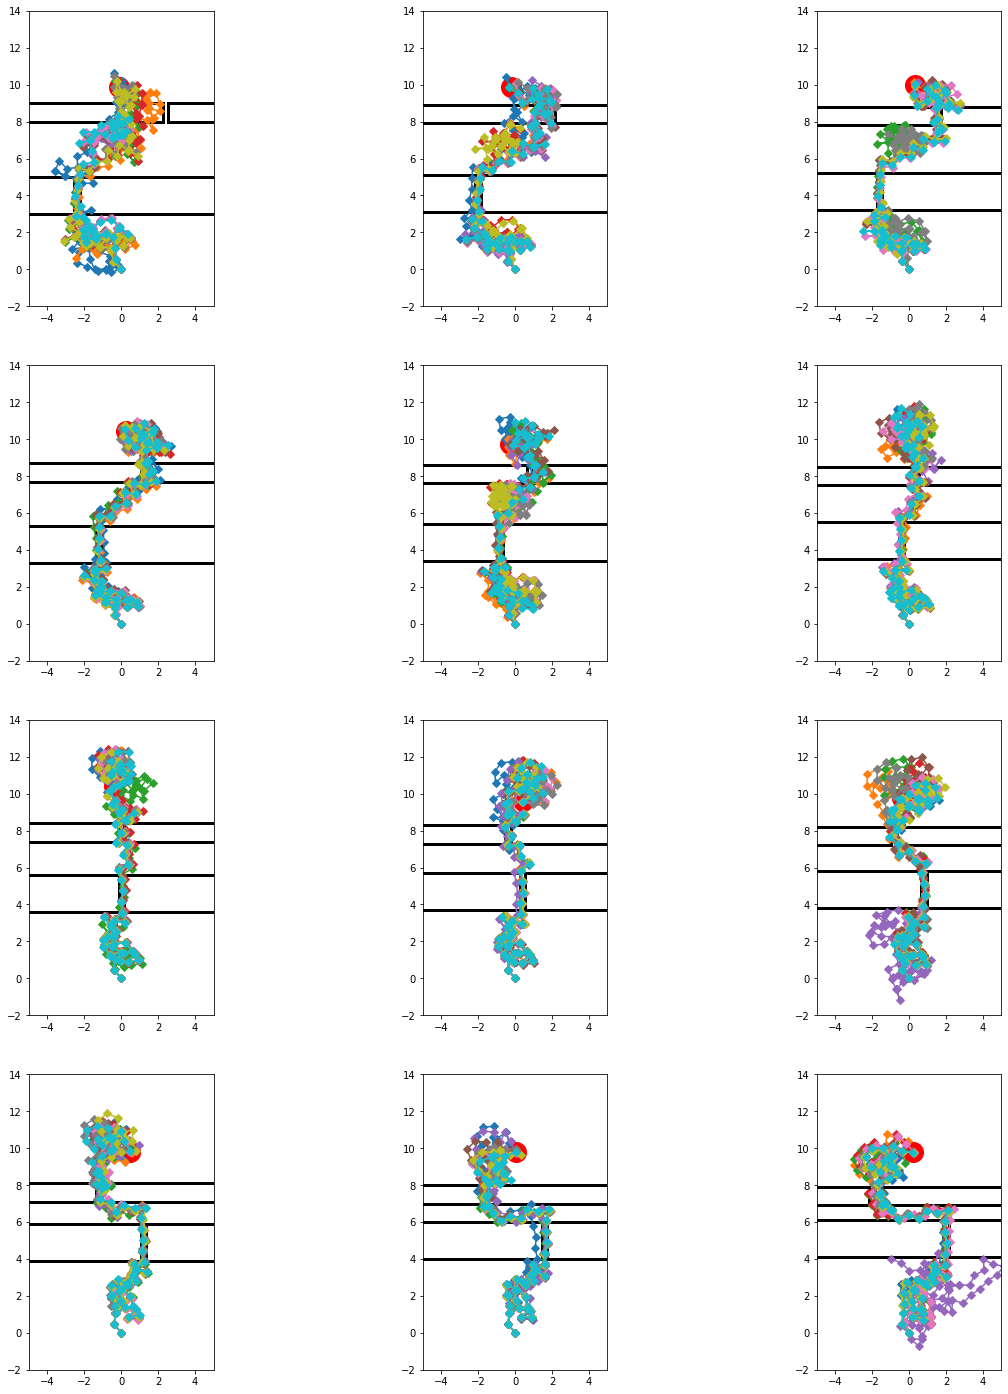

In [5]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 14))


In [6]:
random_state("rng_states/experiment6.npy")

In [7]:
S = [0.6] * 60
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

rectangles = [((-25., 3.), (-3.15, 5.)), ((-2.85, 3.), (25., 5.)),
              ((-25., 8.), (2.85, 9.)), ((3.15, 8.), (25., 9.))]
rectangle_vs = [(0.5, 0.1)] * (len(rectangles) // 2) + [(-0.5, -0.1)] * (len(rectangles) // 2)
targets = np.array([0., 10.]) + np.random.uniform(-0.5, 0.5, size=(T, 2))
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 800
alpha_inf = 0.85
n_immigrants = 300
eta_c = 5.
eta_m = 30.
p_c = 0.9
p_m = np.geomspace(0.01, 0.2, d)
num_iterations_init = 400
num_iterations = 200

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=40)

t=0
Iteration 0, #feasible: 244, best: [47.49073997], #infeasible: 556, best: [0.06493497 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 40, #feasible: 120, best: [47.49073997], #infeasible: 680, best: [3.22187634e-04 1.00000000e+00]
Iteration 80, #feasible: 120, best: [47.49073997], #infeasible: 680, best: [3.22187634e-04 1.00000000e+00]
Iteration 120, #feasible: 120, best: [47.49073997], #infeasible: 680, best: [1.68978816e-04 1.00000000e+00]
Iteration 160, #feasible: 120, best: [47.43611714], #infeasible: 680, best: [3.95807954e-05 1.00000000e+00]
Iteration 200, #feasible: 120, best: [47.38244124], #infeasible: 680, best: [6.00466735e-07 1.00000000e+00]
Iteration 240, #feasible: 120, best: [47.38244124], #infeasible: 680, best: [6.00466735e-07 1.00000000e+00]
Iteration 280, #feasible: 120, best: [47.38244124], #infeasible: 680, best: [6.00466735e-07 1.00000000e+00]
Iteration 320, #feasible: 120, best: [47.38244124], #infeasible: 680, best: [6.00466735e-07 1.00000000e+00]
Iteration 360, #feasible: 120, best: [47.38244124], #infeasible: 680, best: [6.00466735e-07 1.00000000e+00]
Iteration 399, #feasible: 120,

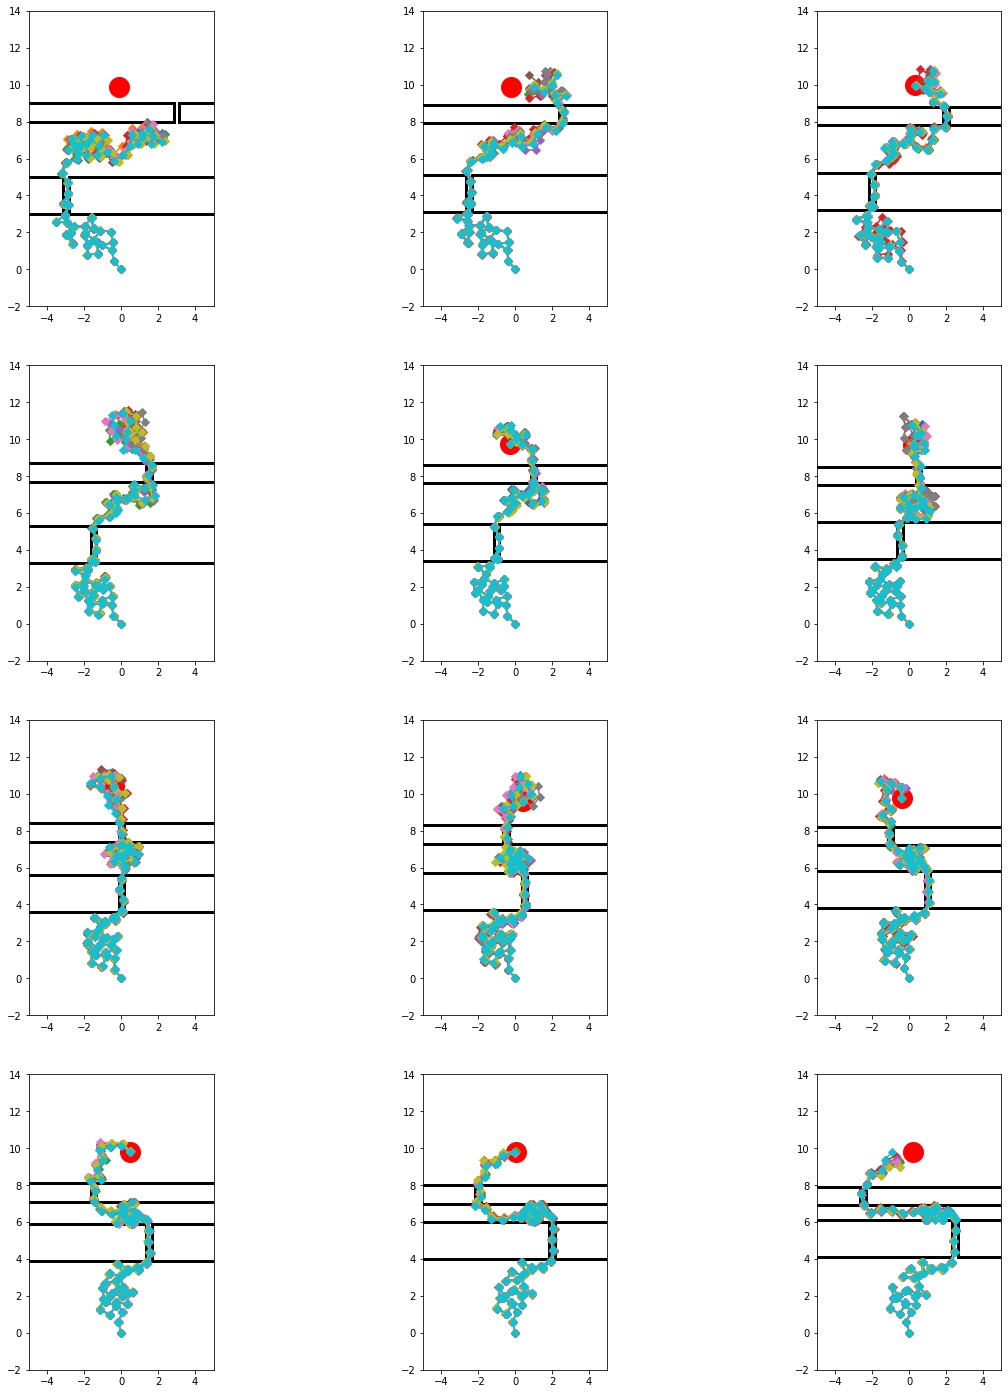

In [8]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 14))

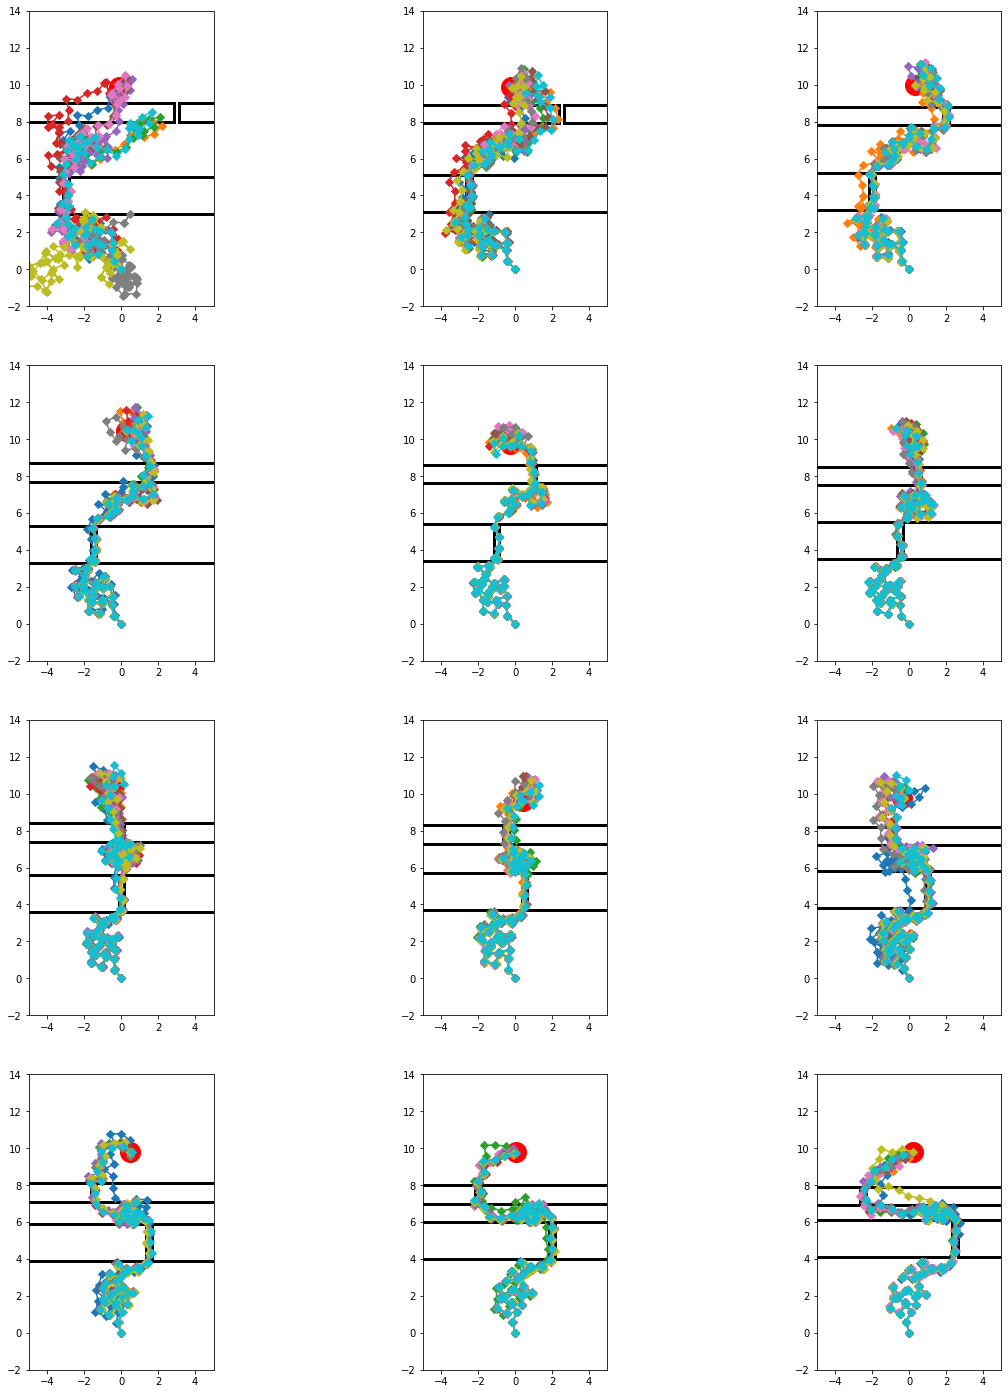

In [9]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 14))
